<a href="https://colab.research.google.com/github/jubymariajoseph/DSA-Activities/blob/main/Preprocessing_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/House_Pricing.csv')
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [4]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Cleaning the dataset and missing value Handling

In [5]:
df.isnull().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [6]:
df1 = df.drop(columns = 'No of Times Visited')

In [7]:
df1

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [8]:
df1.duplicated().sum()

np.int64(0)

In [9]:
null_rows = df1[df1['Sale Price'].isna()]
null_rows

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
90,2791500270,14 May 2017,NaN,4,2.5,1980.0,7403.0,2.0,No,Fair,7,1980.0,0,30,0,98023.0,47.2897,-122.372,1980.0,7510
168,3261020370,14 June 2017,NaN,3,2.5,2680.0,9750.0,1.0,No,Good,8,1610.0,1070,39,0,98034.0,47.7028,-122.231,2480.0,8750
21456,3362401761,15 February 2016,NaN,2,1.5,1020.0,1049.0,3.0,No,Fair,8,1020.0,0,10,0,98103.0,47.6800,-122.348,1350.0,1395
21522,603000555,15 March 2016,NaN,6,3.0,2390.0,4000.0,2.0,No,Fair,7,2390.0,0,4,0,98118.0,47.5173,-122.286,1680.0,5000


In [10]:
df2 = df1.dropna(subset=['Sale Price'])
df2

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [11]:
df2.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
Condition of the House,0


In [12]:
null_rows1 = df2[df2['Flat Area (in Sqft)'].isna()]
null_rows1

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
249,3797001895,15 April 2016,481000.0,3,1.75,NaN,3000.0,1.0,No,Good,6,770.0,790,100,0,98103.0,47.6846,-122.345,1390.0,3000
275,4215100060,15 March 2016,365000.0,3,2.50,NaN,4510.0,2.0,No,Fair,8,2653.0,0,12,0,98031.0,47.4145,-122.166,2653.0,4927
296,5468730030,14 August 2017,265000.0,3,2.00,NaN,8959.0,1.0,No,Fair,7,1320.0,0,25,0,98042.0,47.3536,-122.144,1740.0,7316
372,2231500030,15 March 2016,530000.0,4,2.25,NaN,10754.0,1.0,No,Excellent,7,1100.0,1080,64,0,98133.0,47.7711,-122.341,1810.0,6929
16064,7954300460,14 September 2017,568500.0,4,2.50,NaN,6181.0,2.0,No,Fair,9,3010.0,0,18,0,98056.0,47.5212,-122.192,2960.0,6515
18152,7574910450,15 February 2016,845000.0,4,2.50,NaN,40471.0,2.0,No,Good,10,3360.0,0,24,0,98077.0,47.7420,-122.035,3150.0,36823
20385,2781240040,14 August 2017,342000.0,3,2.00,NaN,4802.0,1.0,No,Fair,8,1640.0,0,8,0,98038.0,47.3538,-122.021,1940.0,4802
20965,3679400484,14 September 2017,295500.0,3,2.50,NaN,1332.0,2.0,No,Fair,7,960.0,450,4,0,98108.0,47.5683,-122.314,1410.0,1343
21335,5100400244,15 April 2016,403000.0,2,1.00,NaN,1552.0,2.0,No,Fair,7,894.0,0,7,0,98115.0,47.6911,-122.313,1131.0,1992


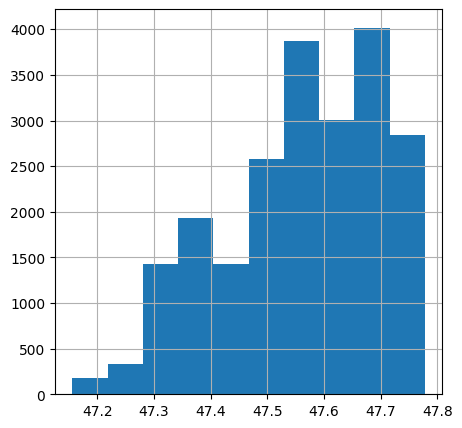

In [13]:
df2['Latitude'].hist(figsize=(5,5));

<Axes: >

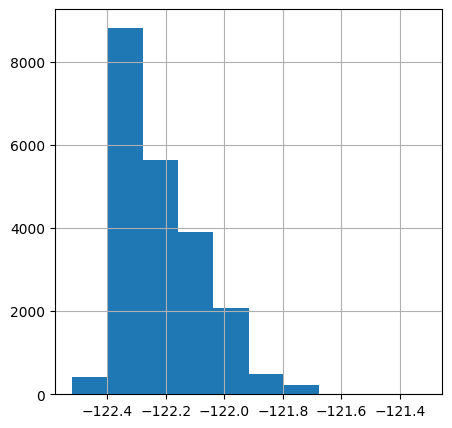

In [14]:
df2['Longitude'].hist(figsize=(5,5))

In [15]:
df2['Longitude'].fillna(df2['Longitude'].median(),inplace=True)



/tmp/ipython-input-2433648352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Longitude'].fillna(df2['Longitude'].median(),inplace=True)
/tmp/ipython-input-2433648352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Longitude'].fillna(df2['Longitude'].median(),inplace=True)


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade              

In [17]:
df2['Latitude'].fillna(df2['Latitude'].median(), inplace =True)

/tmp/ipython-input-333494351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Latitude'].fillna(df2['Latitude'].median(), inplace =True)
/tmp/ipython-input-333494351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Latitude'].fillna(df2['Latitude'].median(), inplace =True)


In [18]:
df2.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
Condition of the House,0


In [19]:
df2

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


<Axes: >

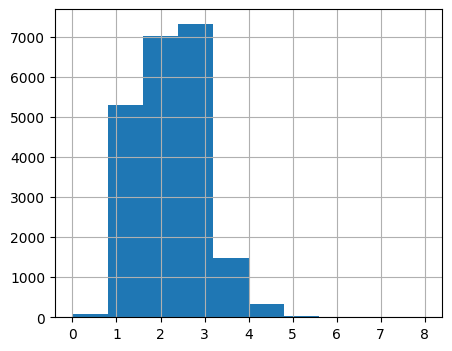

In [20]:
df2['No of Bathrooms'].hist(figsize=(5,4))

In [21]:
df2['No of Bathrooms'].fillna(df2['No of Bathrooms'].median(), inplace =True)

/tmp/ipython-input-1812911953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['No of Bathrooms'].fillna(df2['No of Bathrooms'].median(), inplace =True)
/tmp/ipython-input-1812911953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['No of Bathrooms'].fillna(df2['No of Bathrooms'].median(), inplace =True)


<Axes: >

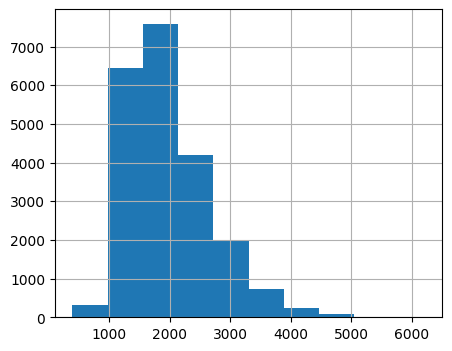

In [22]:
df2['Living Area after Renovation (in Sqft)'].hist(figsize=(5,4))

In [23]:
df2['Living Area after Renovation (in Sqft)'].fillna(df2['Living Area after Renovation (in Sqft)'].median(), inplace =True)

/tmp/ipython-input-3290965815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Living Area after Renovation (in Sqft)'].fillna(df2['Living Area after Renovation (in Sqft)'].median(), inplace =True)
/tmp/ipython-input-3290965815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Living Area after Renovation (in Sqft)'].fillna(df2[

<Axes: >

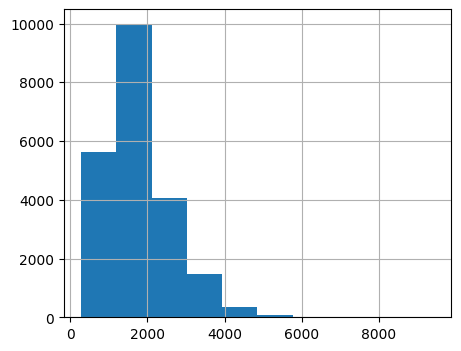

In [24]:
df2['Area of the House from Basement (in Sqft)'].hist(figsize=(5,4))

In [25]:
df2['Area of the House from Basement (in Sqft)'].fillna(df2['Area of the House from Basement (in Sqft)'].median(), inplace =True)

/tmp/ipython-input-3192130638.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Area of the House from Basement (in Sqft)'].fillna(df2['Area of the House from Basement (in Sqft)'].median(), inplace =True)
/tmp/ipython-input-3192130638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Area of the House from Basement (in Sqft)'].fi

In [26]:
df2.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
Condition of the House,0


<Axes: >

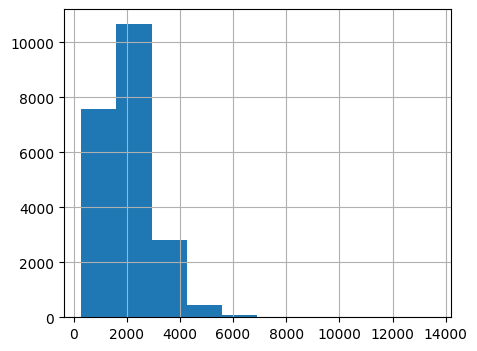

In [27]:
df2['Flat Area (in Sqft)'].hist(figsize=(5,4))

In [28]:
df2['Flat Area (in Sqft)'].fillna(df2['Flat Area (in Sqft)'].median(), inplace =True)

/tmp/ipython-input-1151341565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Flat Area (in Sqft)'].fillna(df2['Flat Area (in Sqft)'].median(), inplace =True)
/tmp/ipython-input-1151341565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Flat Area (in Sqft)'].fillna(df2['Flat Area (in Sqft)'].median(), inplace =True)


In [29]:
df2.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
Condition of the House,0


In [30]:
df2['Lot Area (in Sqft)'].fillna(df2['Lot Area (in Sqft)'].median(), inplace =True)

/tmp/ipython-input-2047853033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Lot Area (in Sqft)'].fillna(df2['Lot Area (in Sqft)'].median(), inplace =True)
/tmp/ipython-input-2047853033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lot Area (in Sqft)'].fillna(df2['Lot Area (in Sqft)'].median(), inplace =True)


In [31]:
df2['Zipcode'].fillna(df2['Zipcode'].mode()[0], inplace =True)

/tmp/ipython-input-304739324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Zipcode'].fillna(df2['Zipcode'].mode()[0], inplace =True)
/tmp/ipython-input-304739324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Zipcode'].fillna(df2['Zipcode'].mode()[0], inplace =True)


In [32]:
df2.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0


In [33]:
num_cols1 = df2.select_dtypes(include=np.number)
num_cols1

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [34]:
num_cols1.corr()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.016834,0.001450,0.005233,-0.012379,-0.132153,0.018653,0.013762,-0.010724,-0.005189,-0.021524,-0.016936,-0.008235,-0.001983,0.020720,-0.002913,-0.138843
Sale Price,-0.016834,1.000000,0.308463,0.525090,0.702056,0.089559,0.256941,0.580654,0.605366,0.323813,-0.054034,0.126436,-0.053191,0.306889,0.021508,0.585394,0.082445
No of Bedrooms,0.001450,0.308463,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,0.018861,-0.152760,-0.008708,0.129569,0.391771,0.029264
No of Bathrooms,0.005233,0.525090,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,0.050761,-0.203951,0.024570,0.223171,0.568568,0.087226
Flat Area (in Sqft),-0.012379,0.702056,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,0.055380,-0.199380,0.052538,0.240091,0.756185,0.183223
Lot Area (in Sqft),-0.132153,0.089559,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,0.007634,-0.129551,-0.085719,0.229449,0.144507,0.718527
No of Floors,0.018653,0.256941,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,0.006376,-0.059222,0.049692,0.125620,0.280106,-0.011204
Overall Grade,0.013762,0.580654,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,0.010436,-0.185844,0.111226,0.201736,0.681362,0.107581
Area of the House from Basement (in Sqft),-0.010724,0.605366,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,0.023308,-0.261124,-0.000819,0.343793,0.731996,0.194106
Basement Area (in Sqft),-0.005189,0.323813,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.071328,0.074933,0.110451,-0.144822,0.200302,0.017263


In [35]:
num_cols1 = df2.select_dtypes(include=['float64', 'int64'])
num_cols1

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


**Treatment of Outliers**

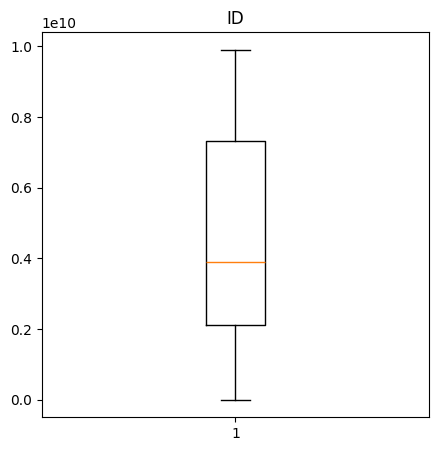

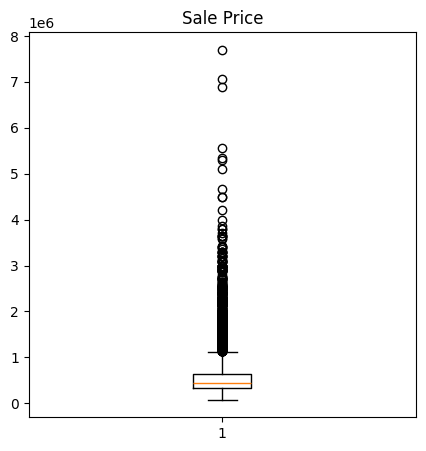

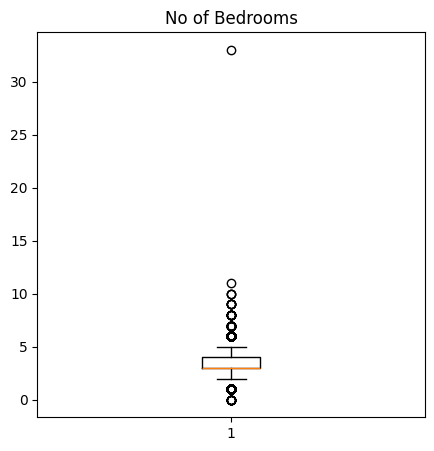

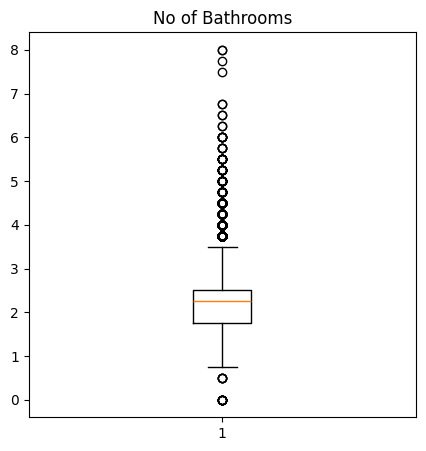

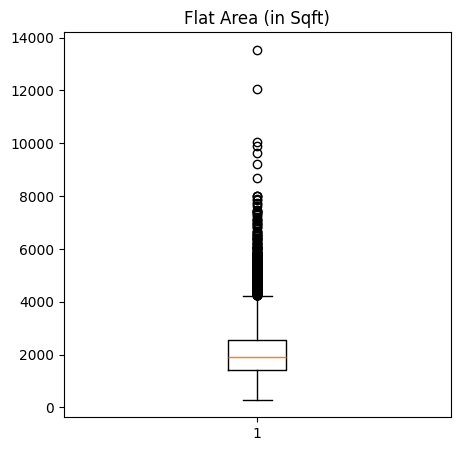

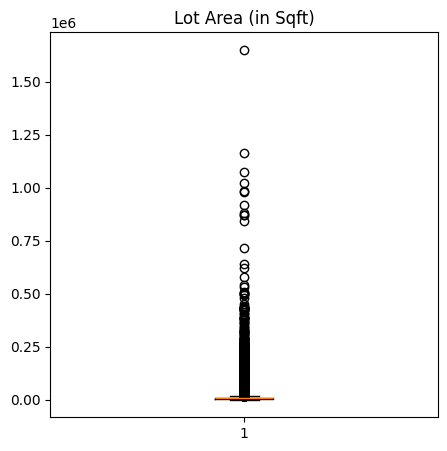

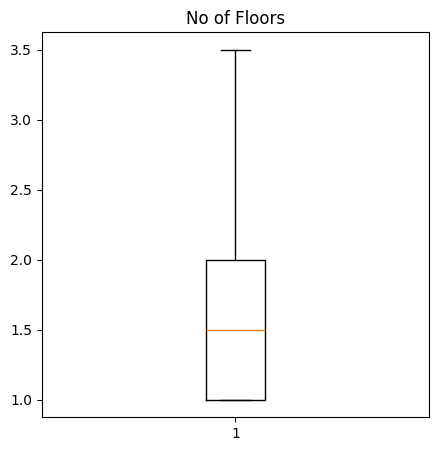

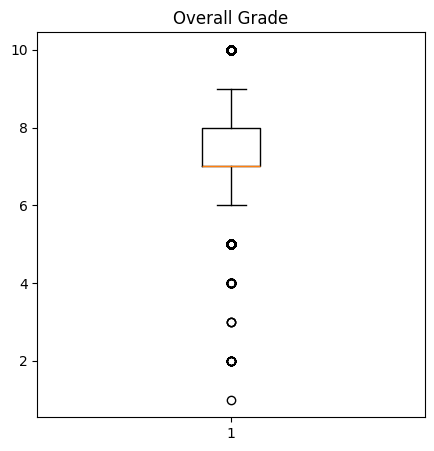

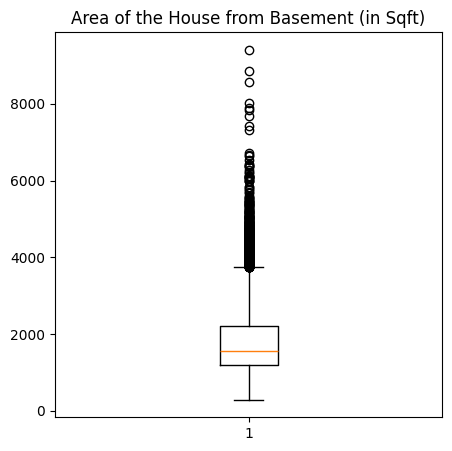

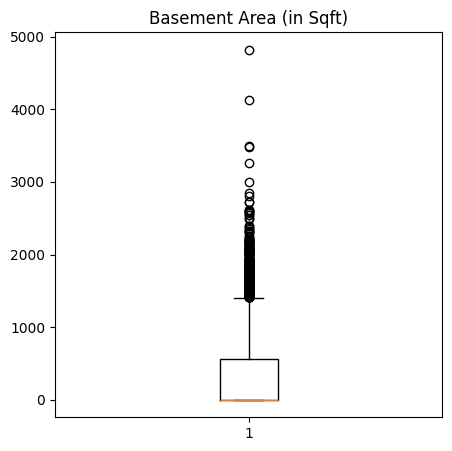

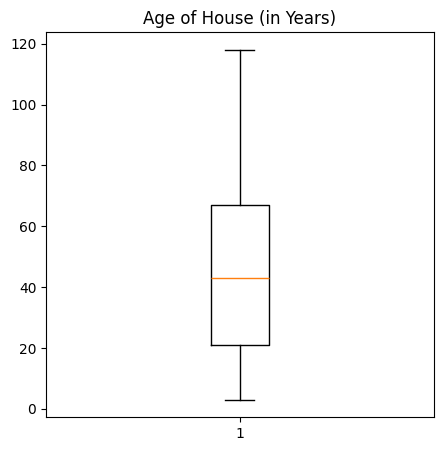

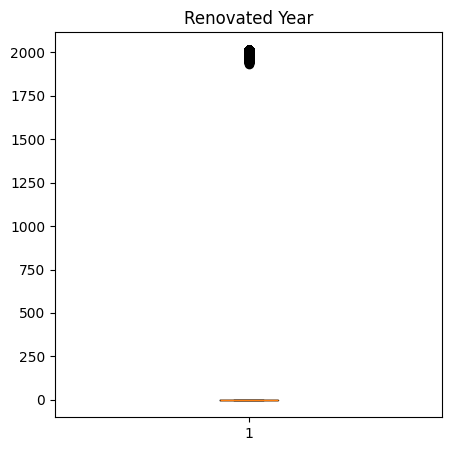

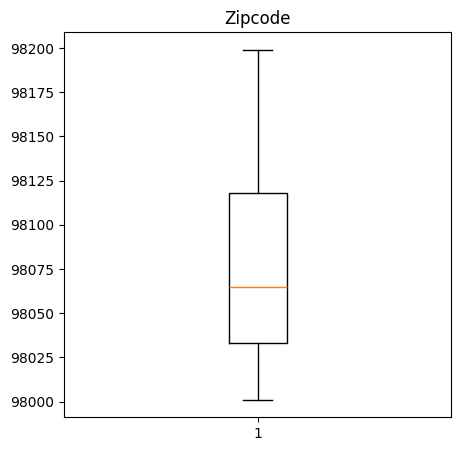

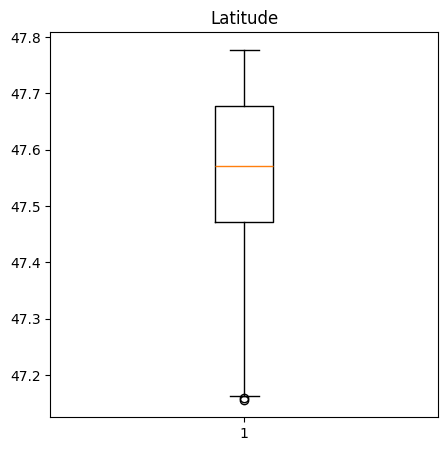

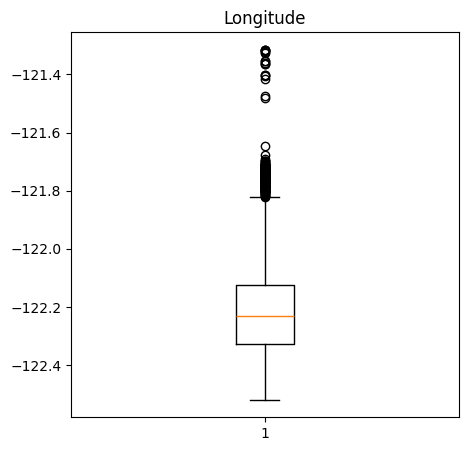

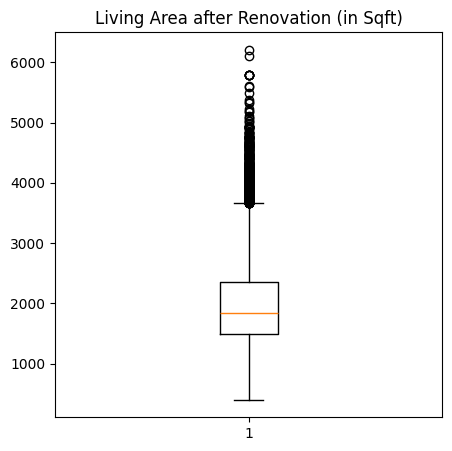

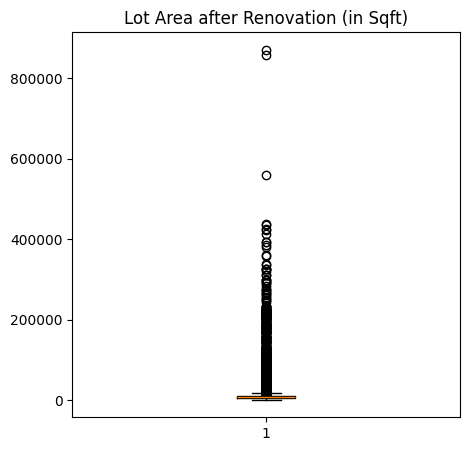

In [37]:
for i in num_cols1:
  plt.figure(figsize = (5,5))
  plt.boxplot(df2[i])
  plt.title(i)

In [38]:
q10 = np.quantile(df2['No of Bedrooms'],0.25)
q30 = np.quantile(df2['No of Bedrooms'],0.75)
iqr0 = q30-q10
upper_bound0 = q30+(1.5*iqr0)
lower_bound0 = q10-(1.5*iqr0)
print(upper_bound0)
print(lower_bound0)
print(iqr0)

5.5
1.5
1.0


In [39]:
from scipy.stats.mstats import winsorize

In [40]:
bedroom_values = df2['No of Bedrooms'].values  #   convert to numpy
windsorized_data = winsorize(bedroom_values, limits=[0.002, 0.002])
df2['No of Bedrooms'] = windsorized_data

/tmp/ipython-input-1962561999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['No of Bedrooms'] = windsorized_data


{'whiskers': [<matplotlib.lines.Line2D at 0x78de72f3a420>,
 'caps': [<matplotlib.lines.Line2D at 0x78de72f3bfe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78de72f39400>],
 'medians': [<matplotlib.lines.Line2D at 0x78de72f805f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78de72f80890>],
 'means': []}

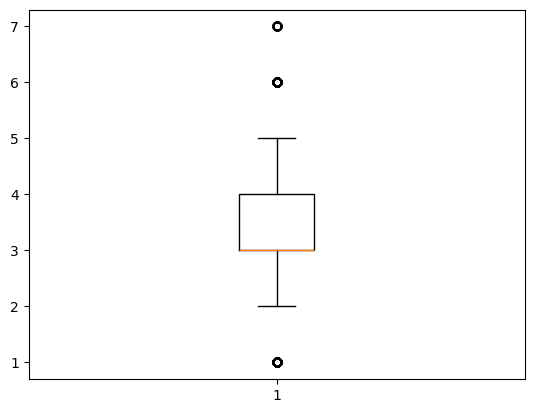

In [41]:
plt.boxplot(df2['No of Bedrooms'])

In [42]:
q11 = np.quantile(df2['No of Bathrooms'],0.25)
q31 = np.quantile(df2['No of Bathrooms'],0.75)
iqr1 = q31-q11
upper_bound1 = q31+(1.5*iqr1)
lower_bound1 = q11-(1.5*iqr1)
print(upper_bound1)
print(lower_bound1)
print(iqr1)

3.625
0.625
0.75


In [43]:
bathroom_outliers = []
for i in df2['No of Bathrooms']:
  if i>upper_bound1 or i<lower_bound1:
    bathroom_outliers.append(i)
bathroom_outliers

[4.5,
 4.0,
 4.0,
 4.75,
 5.0,
 4.25,
 4.5,
 4.25,
 3.75,
 5.0,
 4.0,
 4.0,
 4.25,
 4.25,
 0.0,
 4.25,
 4.5,
 4.5,
 3.75,
 4.5,
 4.0,
 0.0,
 4.5,
 5.25,
 4.0,
 3.75,
 4.5,
 4.5,
 4.25,
 6.0,
 3.75,
 4.25,
 4.0,
 3.75,
 3.75,
 4.75,
 5.0,
 3.75,
 3.75,
 3.75,
 5.0,
 4.25,
 3.75,
 4.0,
 4.25,
 4.5,
 3.75,
 4.0,
 3.75,
 5.0,
 3.75,
 4.0,
 3.75,
 3.75,
 4.25,
 4.0,
 4.25,
 4.25,
 4.5,
 3.75,
 4.0,
 3.75,
 5.0,
 3.75,
 0.5,
 4.0,
 5.0,
 5.0,
 4.5,
 5.5,
 4.25,
 4.0,
 4.5,
 3.75,
 3.75,
 4.5,
 3.75,
 5.5,
 4.25,
 5.5,
 0.0,
 5.25,
 4.25,
 4.0,
 4.5,
 3.75,
 3.75,
 3.75,
 3.75,
 4.25,
 4.5,
 4.75,
 3.75,
 3.75,
 3.75,
 3.75,
 3.75,
 4.5,
 4.25,
 4.0,
 4.75,
 4.75,
 3.75,
 4.5,
 4.0,
 3.75,
 3.75,
 4.0,
 4.0,
 3.75,
 4.75,
 4.5,
 3.75,
 6.75,
 6.0,
 4.5,
 5.5,
 4.5,
 3.75,
 4.0,
 4.25,
 3.75,
 5.75,
 3.75,
 4.0,
 4.0,
 4.0,
 5.25,
 4.75,
 4.0,
 4.25,
 3.75,
 4.0,
 4.0,
 5.25,
 3.75,
 3.75,
 3.75,
 4.5,
 5.0,
 3.75,
 3.75,
 4.5,
 4.0,
 3.75,
 3.75,
 4.0,
 4.75,
 3.75,
 0.0,
 4.25,
 5.0,
 3.75,


In [44]:
bathroom_values = df2['No of Bathrooms'].values  #   convert to numpy
windsorized_data1 = winsorize(bathroom_values, limits=[0.002, 0.002])
df2['No of Bathrooms'] = windsorized_data1

/tmp/ipython-input-3332810530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['No of Bathrooms'] = windsorized_data1


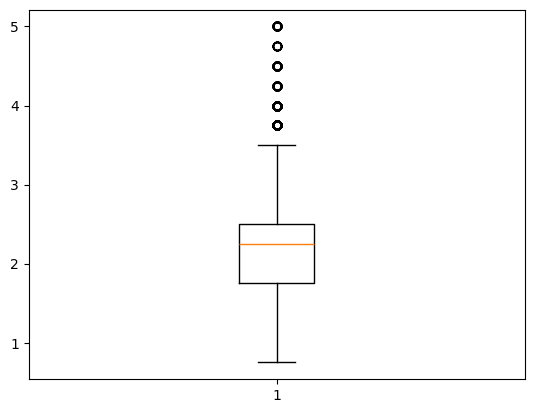

In [45]:
plt.boxplot(df2['No of Bathrooms']);

In [46]:
flat_values = df2['Flat Area (in Sqft)'].values  #   convert to numpy
windsorized_data11 = winsorize(flat_values, limits=[0.001, 0.003])
df2['Flat Area (in Sqft)'] = windsorized_data11

/tmp/ipython-input-531687316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Flat Area (in Sqft)'] = windsorized_data11


In [47]:
lot_values = df2['Lot Area (in Sqft)'].values  #   convert to numpy
windsorized_data12 = winsorize(lot_values, limits=[0.001, 0.003])
df2['Lot Area (in Sqft)'] = windsorized_data12

/tmp/ipython-input-947830118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lot Area (in Sqft)'] = windsorized_data12


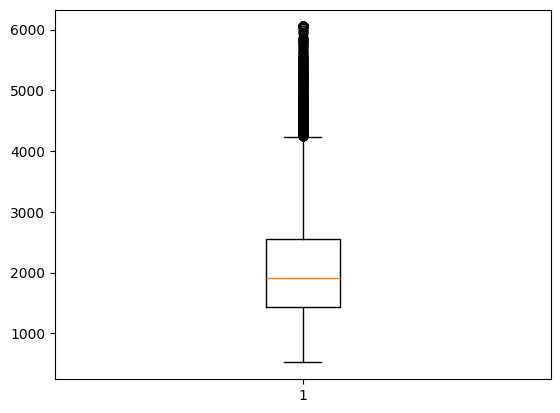

In [48]:
plt.boxplot(df2['Flat Area (in Sqft)']);

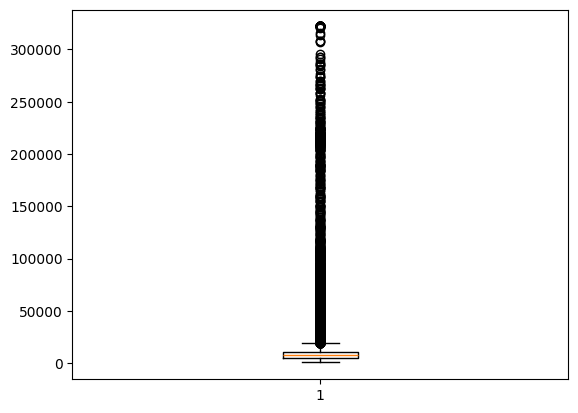

In [49]:
plt.boxplot(df2['Lot Area (in Sqft)']);

In [50]:
q12 = np.quantile(df2['Overall Grade'],0.25)
q32 = np.quantile(df2['Overall Grade'],0.75)
iqr2 = q32-q12
upper_bound2 = q32+(1.5*iqr2)
lower_bound2 = q12-(1.5*iqr2)
print(upper_bound2)
print(lower_bound2)
print(iqr2)

9.5
5.5
1.0


In [51]:
grade_outliers = []
for i in df2['Overall Grade']:
  if i>upper_bound2 or i<lower_bound2:
    grade_outliers.append(i)
grade_outliers

[10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 5,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 10,
 5,
 10,
 10,
 10,
 5,
 10,
 5,
 10,
 3,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10

In [52]:
grade_values = df2['Overall Grade'].values  #   convert to numpy
windsorized_data2 = winsorize(grade_values, limits=[0.005, 0.002])
df2['Overall Grade'] = windsorized_data2

/tmp/ipython-input-1395103066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Overall Grade'] = windsorized_data2


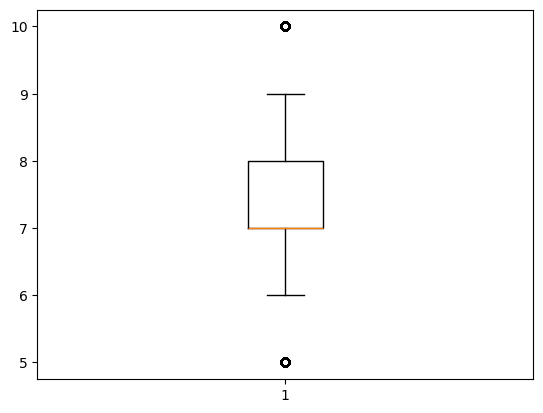

In [53]:
plt.boxplot(df2['Overall Grade']);

In [54]:
q13 = np.quantile(df2['Area of the House from Basement (in Sqft)'],0.25)
q33 = np.quantile(df2['Area of the House from Basement (in Sqft)'],0.75)
iqr3 = q33-q13
upper_bound3 = q33+(1.5*iqr3)
lower_bound3 = q13-(1.5*iqr3)
print(upper_bound3)
print(lower_bound3)
print(iqr3)

3740.0
-340.0
1020.0


In [55]:
basement_outliers = []
for i in df2['Area of the House from Basement (in Sqft)']:
  if i>upper_bound3 or i<lower_bound3:
    basement_outliers.append(i)
basement_outliers

[3890.0,
 3760.0,
 4750.0,
 5310.0,
 3840.0,
 6070.0,
 4040.0,
 3840.0,
 4860.0,
 3860.0,
 4410.0,
 6050.0,
 4740.0,
 5403.0,
 4120.0,
 4150.0,
 4370.0,
 4570.0,
 4670.0,
 4230.0,
 4270.0,
 5670.0,
 4475.0,
 6070.0,
 4300.0,
 3990.0,
 5990.0,
 4460.0,
 4190.0,
 4250.0,
 4930.0,
 3840.0,
 5000.0,
 5320.0,
 6720.0,
 4210.0,
 3890.0,
 3830.0,
 5153.0,
 4210.0,
 4740.0,
 5450.0,
 4280.0,
 3880.0,
 4570.0,
 3750.0,
 4130.0,
 5710.0,
 4700.0,
 3810.0,
 4490.0,
 4150.0,
 4070.0,
 3840.0,
 5770.0,
 4030.0,
 3810.0,
 4490.0,
 3840.0,
 4360.0,
 3960.0,
 4460.0,
 4340.0,
 3850.0,
 4750.0,
 4350.0,
 4160.0,
 5180.0,
 4070.0,
 5130.0,
 6350.0,
 3770.0,
 3780.0,
 4750.0,
 3950.0,
 3915.0,
 3880.0,
 4870.0,
 4030.0,
 4740.0,
 3850.0,
 4860.0,
 4310.0,
 3930.0,
 4070.0,
 4080.0,
 5400.0,
 6110.0,
 3859.0,
 4600.0,
 3940.0,
 3800.0,
 4230.0,
 4070.0,
 5050.0,
 4000.0,
 4220.0,
 3860.0,
 3890.0,
 3890.0,
 5230.0,
 5370.0,
 4140.0,
 4270.0,
 4430.0,
 4210.0,
 4130.0,
 3780.0,
 4610.0,
 7680.0,
 4250.0,
 

In [56]:
df2['Area of the House from Basement (in Sqft)'] = df2['Area of the House from Basement (in Sqft)'].apply(lambda x: np.log1p(x))

/tmp/ipython-input-651620604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Area of the House from Basement (in Sqft)'] = df2['Area of the House from Basement (in Sqft)'].apply(lambda x: np.log1p(x))


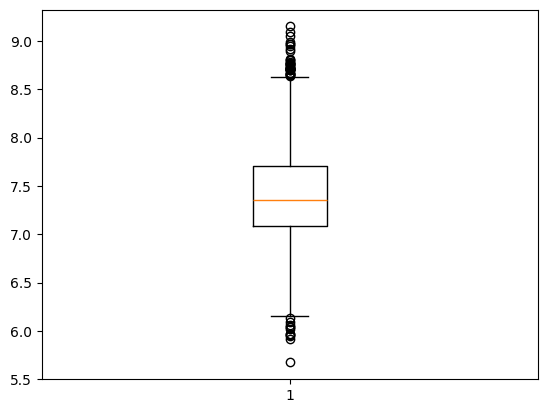

In [57]:
plt.boxplot(df2['Area of the House from Basement (in Sqft)']);

In [58]:
area_values = df2['Basement Area (in Sqft)'].values  #   convert to numpy
windsorized_data3 = winsorize(area_values, limits=[0.001, 0.003])
df2['Basement Area (in Sqft)'] = windsorized_data3

/tmp/ipython-input-4272681894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Basement Area (in Sqft)'] = windsorized_data3


{'whiskers': [<matplotlib.lines.Line2D at 0x78de72ecf110>,
 'caps': [<matplotlib.lines.Line2D at 0x78de72ecf5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78de72eceea0>],
 'medians': [<matplotlib.lines.Line2D at 0x78de72ecfb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x78de72ecfe90>],
 'means': []}

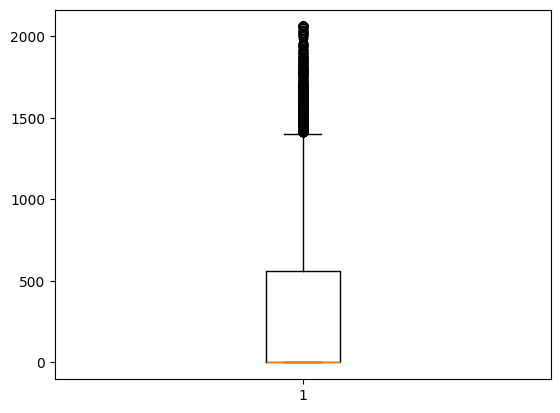

In [59]:
plt.boxplot(df2['Basement Area (in Sqft)'])

In [60]:
q14 = np.quantile(df2['Latitude'],0.25)
q34 = np.quantile(df2['Latitude'],0.75)
iqr4 = q34-q14
upper_bound4 = q34+(1.5*iqr4)
lower_bound4 = q14-(1.5*iqr4)
print(upper_bound4)
print(lower_bound4)
print(iqr4)

47.9885
47.1605
0.20700000000000074


In [61]:
latitude_outliers = []
for i in df2['Latitude']:
  if i>upper_bound4 or i<lower_bound4:
    latitude_outliers.append(i)
latitude_outliers

[47.1559, 47.1593]

In [62]:
df2['Latitude']= df2['Latitude'].clip(lower = lower_bound4,upper = upper_bound4)

/tmp/ipython-input-1425202581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Latitude']= df2['Latitude'].clip(lower = lower_bound4,upper = upper_bound4)


{'whiskers': [<matplotlib.lines.Line2D at 0x78de72e6d1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x78de72e55a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x78de72fc05c0>],
 'medians': [<matplotlib.lines.Line2D at 0x78de72e96ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78de72e97a40>],
 'means': []}

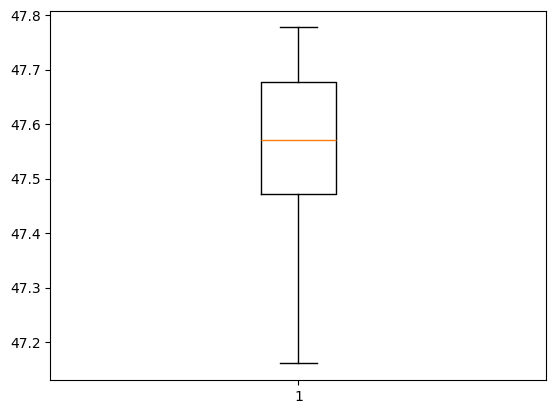

In [63]:
plt.boxplot(df2['Latitude'])

In [64]:
longi_values = df2['Longitude'].values  #   convert to numpy
windsorized_data4 = winsorize(longi_values, limits=[0.001, 0.003])
df2['Longitude'] = windsorized_data4

/tmp/ipython-input-3797790065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Longitude'] = windsorized_data4


{'whiskers': [<matplotlib.lines.Line2D at 0x78de72df6ae0>,
 'caps': [<matplotlib.lines.Line2D at 0x78de72df70e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78de72df67b0>],
 'medians': [<matplotlib.lines.Line2D at 0x78de72df7680>],
 'fliers': [<matplotlib.lines.Line2D at 0x78de72df7800>],
 'means': []}

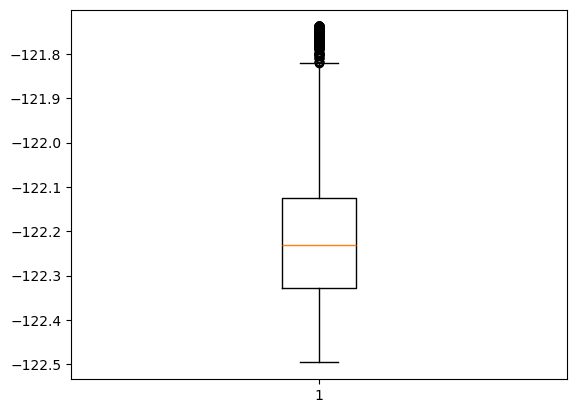

In [65]:
plt.boxplot(df2['Longitude'])

In [66]:
living_values = df2['Living Area after Renovation (in Sqft)'].values  #   convert to numpy
windsorized_data5 = winsorize(living_values, limits=[0.001, 0.003])
df2['Living Area after Renovation (in Sqft)'] = windsorized_data5

/tmp/ipython-input-2884799107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Living Area after Renovation (in Sqft)'] = windsorized_data5


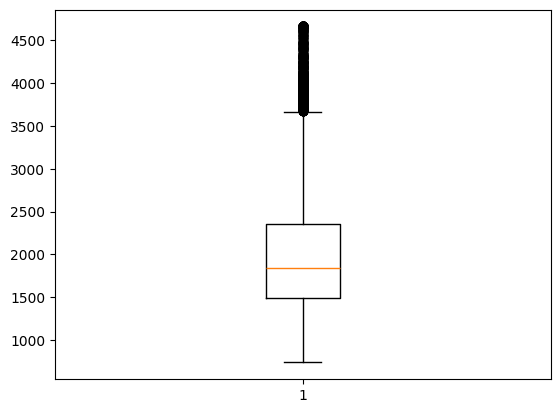

In [67]:
plt.boxplot(df2['Living Area after Renovation (in Sqft)']);

In [68]:
df2

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,7.074117,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,7.682943,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,6.647688,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,6.957497,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,7.427144,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,8,7.333676,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,8,7.745436,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,7,6.928538,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,8,7.378384,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


**Encoding Of The Dataset**

In [69]:
df['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
label_enc = LabelEncoder()
df2['Waterfront View']= label_enc.fit_transform(df2[['Waterfront View']])
df2

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipython-input-4131003061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Waterfront View']= label_enc.fit_transform(df2[['Waterfront View']])


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,Fair,7,7.074117,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,Fair,7,7.682943,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,Fair,6,6.647688,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,Excellent,7,6.957497,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,Fair,8,7.427144,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,0,Fair,8,7.333676,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,0,Fair,8,7.745436,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,0,Fair,7,6.928538,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,0,Fair,8,7.378384,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [71]:
df2['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [72]:
label_enc1 = LabelEncoder()
df2['Condition of the House']= label_enc1.fit_transform(df2[['Condition of the House']])
df2

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipython-input-1191128110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Condition of the House']= label_enc1.fit_transform(df2[['Condition of the House']])


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,7.074117,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,7.682943,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,6.647688,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,1,7,6.957497,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,7.427144,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,0,2,8,7.333676,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,0,2,8,7.745436,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,0,2,7,6.928538,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,0,2,8,7.378384,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  int64  
 9   Condition of the House                     21609 non-null  int64  
 10  Overall Grade              

In [74]:
num_cols2 = df2.select_dtypes(include=['float64', 'int64'])
num_cols2.corr()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.016834,0.002450,0.005678,-0.012392,-0.153605,0.018653,-0.002733,-0.018893,0.013446,-0.001396,-0.004990,-0.021524,-0.016936,-0.008235,-0.001981,0.021159,-0.002522,-0.138843
Sale Price,-0.016834,1.000000,0.317174,0.515366,0.684244,0.101767,0.256941,0.266332,-0.062959,0.599922,0.542631,0.312391,-0.054034,0.126436,-0.053191,0.306890,0.023506,0.584115,0.082445
No of Bedrooms,0.002450,0.317174,1.000000,0.529379,0.599874,0.045125,0.182406,-0.006589,-0.029355,0.365169,0.532735,0.309499,-0.162854,0.018561,-0.159308,-0.011403,0.140314,0.408162,0.031509
No of Bathrooms,0.005678,0.515366,0.529379,1.000000,0.753163,0.099572,0.504736,0.062221,-0.128531,0.651758,0.695835,0.276395,-0.510770,0.049477,-0.205934,0.024056,0.229807,0.571376,0.084700
Flat Area (in Sqft),-0.012392,0.684244,0.599874,0.753163,1.000000,0.203744,0.357824,0.098669,-0.071808,0.733936,0.849491,0.424484,-0.324006,0.052821,-0.202468,0.052213,0.248669,0.762500,0.181005
Lot Area (in Sqft),-0.153605,0.101767,0.045125,0.099572,0.203744,1.000000,-0.011228,0.026772,0.031003,0.126433,0.195037,0.019058,-0.067344,0.011589,-0.152980,-0.095103,0.270777,0.183099,0.774413
No of Floors,0.018653,0.256941,0.182406,0.504736,0.357824,-0.011228,1.000000,0.023719,-0.152860,0.466547,0.547601,-0.248971,-0.489244,0.006376,-0.059222,0.049694,0.126678,0.280974,-0.011204
Waterfront View,-0.002733,0.266332,-0.006589,0.062221,0.098669,0.026772,0.023719,1.000000,-0.001964,0.070835,0.060718,0.075388,0.026149,0.092882,0.030286,-0.014275,-0.041884,0.087058,0.030699
Condition of the House,-0.018893,-0.062959,-0.029355,-0.128531,-0.071808,0.031003,-0.152860,-0.001964,1.000000,-0.088140,-0.077697,0.004618,0.095550,-0.029898,-0.067028,-0.062899,-0.007539,-0.042550,0.030821
Overall Grade,0.013446,0.599922,0.365169,0.651758,0.733936,0.126433,0.466547,0.070835,-0.088140,1.000000,0.731051,0.148631,-0.460558,0.011962,-0.188251,0.112331,0.208925,0.695317,0.110068


In [77]:
num_cols2 = df2.select_dtypes(include=np.number)
num_cols2

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,7.074117,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,7.682943,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,6.647688,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,1,7,6.957497,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,7.427144,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,2,8,7.333676,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,2,8,7.745436,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,2,7,6.928538,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,2,8,7.378384,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


**Scaling of dataset**

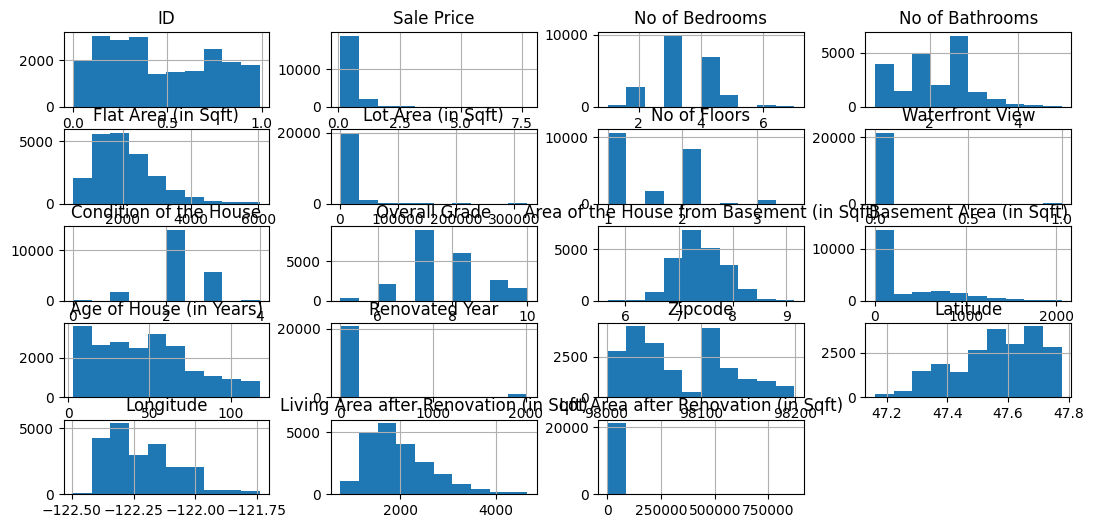

In [82]:
num_cols2.hist(figsize = (13,6));

In [85]:
min_scaler = MinMaxScaler()
df2[['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors',
    'Basement Area (in Sqft)','Age of House (in Years)','Zipcode','Latitude','Longitude',
     'Living Area after Renovation (in Sqft)']] = min_scaler.fit_transform(df2[['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors',
    'Basement Area (in Sqft)','Age of House (in Years)','Zipcode','Latitude','Longitude',
     'Living Area after Renovation (in Sqft)']])

/tmp/ipython-input-2282759654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors',


In [86]:
df2

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,0.058824,0.119349,0.015377,0.0,0,2,7,7.074117,0.000000,0.521739,0,0.893939,0.568303,0.315303,0.153061,5650
1,6414100192,14 December 2017,538000.0,3,0.352941,0.370705,0.020333,0.4,0,2,7,7.682943,0.194175,0.556522,1991,0.626263,0.908281,0.233509,0.242347,7639
2,5631500400,15 February 2016,180000.0,2,0.058824,0.045208,0.028920,0.0,0,2,6,6.647688,0.000000,0.713043,0,0.136364,0.935667,0.346966,0.505102,8062
3,2487200875,14 December 2017,604000.0,4,0.529412,0.260398,0.013353,0.0,0,1,7,6.957497,0.441748,0.434783,0,0.681818,0.583860,0.135884,0.158163,5000
4,1954400510,15 February 2016,510000.0,3,0.294118,0.209765,0.022942,0.0,0,2,8,7.427144,0.000000,0.243478,0,0.368687,0.739426,0.594987,0.270408,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,0.411765,0.182640,0.001308,0.8,0,2,8,7.333676,0.000000,0.052174,0,0.515152,0.873116,0.197889,0.201531,1509
21609,6600060120,15 February 2016,400000.0,4,0.411765,0.323689,0.015884,0.4,0,2,8,7.745436,0.000000,0.008696,0,0.732323,0.567493,0.176781,0.278061,7200
21610,1523300141,14 June 2017,402101.0,2,0.000000,0.090416,0.001989,0.4,0,2,7,6.928538,0.000000,0.052174,0,0.722222,0.703128,0.259894,0.071429,2007
21611,291310100,15 January 2016,400000.0,3,0.411765,0.195298,0.005221,0.4,0,2,8,7.378384,0.000000,0.095652,0,0.131313,0.606061,0.563325,0.170918,1287


In [87]:
std_scaler = StandardScaler()
df2[['No of Bedrooms','Condition of the House', 'Overall Grade',
     'Area of the House from Basement (in Sqft)']]=std_scaler.fit_transform(df2[['No of Bedrooms','Condition of the House', 'Overall Grade',
     'Area of the House from Basement (in Sqft)']])


/tmp/ipython-input-1606250576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['No of Bedrooms','Condition of the House', 'Overall Grade',


In [88]:
df2

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,-0.410676,0.058824,0.119349,0.015377,0.0,0,-0.338178,-0.573631,-0.752183,0.000000,0.521739,0,0.893939,0.568303,0.315303,0.153061,5650
1,6414100192,14 December 2017,538000.0,-0.410676,0.352941,0.370705,0.020333,0.4,0,-0.338178,-0.573631,0.672622,0.194175,0.556522,1991,0.626263,0.908281,0.233509,0.242347,7639
2,5631500400,15 February 2016,180000.0,-1.525398,0.058824,0.045208,0.028920,0.0,0,-0.338178,-1.488367,-1.750131,0.000000,0.713043,0,0.136364,0.935667,0.346966,0.505102,8062
3,2487200875,14 December 2017,604000.0,0.704046,0.529412,0.260398,0.013353,0.0,0,-2.053196,-0.573631,-1.025101,0.441748,0.434783,0,0.681818,0.583860,0.135884,0.158163,5000
4,1954400510,15 February 2016,510000.0,-0.410676,0.294118,0.209765,0.022942,0.0,0,-0.338178,0.341105,0.073989,0.000000,0.243478,0,0.368687,0.739426,0.594987,0.270408,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,-0.410676,0.411765,0.182640,0.001308,0.8,0,-0.338178,0.341105,-0.144749,0.000000,0.052174,0,0.515152,0.873116,0.197889,0.201531,1509
21609,6600060120,15 February 2016,400000.0,0.704046,0.411765,0.323689,0.015884,0.4,0,-0.338178,0.341105,0.818870,0.000000,0.008696,0,0.732323,0.567493,0.176781,0.278061,7200
21610,1523300141,14 June 2017,402101.0,-1.525398,0.000000,0.090416,0.001989,0.4,0,-0.338178,-0.573631,-1.092874,0.000000,0.052174,0,0.722222,0.703128,0.259894,0.071429,2007
21611,291310100,15 January 2016,400000.0,-0.410676,0.411765,0.195298,0.005221,0.4,0,-0.338178,0.341105,-0.040123,0.000000,0.095652,0,0.131313,0.606061,0.563325,0.170918,1287


In [92]:
num_cols3 = df2.select_dtypes(include=['float64', 'int64'])
num_cols3.corr()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.016834,0.002450,0.005678,-0.012392,-0.153605,0.018653,-0.002733,-0.018893,0.013446,-0.001396,-0.004990,-0.021524,-0.016936,-0.008235,-0.001981,0.021159,-0.002522,-0.138843
Sale Price,-0.016834,1.000000,0.317174,0.515366,0.684244,0.101767,0.256941,0.266332,-0.062959,0.599922,0.542631,0.312391,-0.054034,0.126436,-0.053191,0.306890,0.023506,0.584115,0.082445
No of Bedrooms,0.002450,0.317174,1.000000,0.529379,0.599874,0.045125,0.182406,-0.006589,-0.029355,0.365169,0.532735,0.309499,-0.162854,0.018561,-0.159308,-0.011403,0.140314,0.408162,0.031509
No of Bathrooms,0.005678,0.515366,0.529379,1.000000,0.753163,0.099572,0.504736,0.062221,-0.128531,0.651758,0.695835,0.276395,-0.510770,0.049477,-0.205934,0.024056,0.229807,0.571376,0.084700
Flat Area (in Sqft),-0.012392,0.684244,0.599874,0.753163,1.000000,0.203744,0.357824,0.098669,-0.071808,0.733936,0.849491,0.424484,-0.324006,0.052821,-0.202468,0.052213,0.248669,0.762500,0.181005
Lot Area (in Sqft),-0.153605,0.101767,0.045125,0.099572,0.203744,1.000000,-0.011228,0.026772,0.031003,0.126433,0.195037,0.019058,-0.067344,0.011589,-0.152980,-0.095103,0.270777,0.183099,0.774413
No of Floors,0.018653,0.256941,0.182406,0.504736,0.357824,-0.011228,1.000000,0.023719,-0.152860,0.466547,0.547601,-0.248971,-0.489244,0.006376,-0.059222,0.049694,0.126678,0.280974,-0.011204
Waterfront View,-0.002733,0.266332,-0.006589,0.062221,0.098669,0.026772,0.023719,1.000000,-0.001964,0.070835,0.060718,0.075388,0.026149,0.092882,0.030286,-0.014275,-0.041884,0.087058,0.030699
Condition of the House,-0.018893,-0.062959,-0.029355,-0.128531,-0.071808,0.031003,-0.152860,-0.001964,1.000000,-0.088140,-0.077697,0.004618,0.095550,-0.029898,-0.067028,-0.062899,-0.007539,-0.042550,0.030821
Overall Grade,0.013446,0.599922,0.365169,0.651758,0.733936,0.126433,0.466547,0.070835,-0.088140,1.000000,0.731051,0.148631,-0.460558,0.011962,-0.188251,0.112331,0.208925,0.695317,0.110068


SPLITTING OF DATA VERTICALLY AND HORIZONTALLY

In [93]:
Y = df2['Sale Price']
X = df2[['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors',
    'Basement Area (in Sqft)','Age of House (in Years)','Zipcode','Latitude','Longitude',
     'Living Area after Renovation (in Sqft)','Condition of the House', 'Overall Grade',
     'Area of the House from Basement (in Sqft)']]

In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)  #
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17287, 14)
(4322, 14)
(17287,)
(4322,)
